# 비비빅 학습동아리 6회차_스터디
 - 2024.6.12.(수) 18:30~20:00
 - 타이타닉 데이터
 - 빅데이터분석기사 1유형, 2유형 연습

# 공지
 - 학습동아리 깃허브
   - 가입 후 즐겨찾기!
   - https://github.com/pookopook/bibi-big

# 개발환경 설정
  - 파이썬을 업데이트 방법 및 필수 라이브러리 설치
  - https://bit.ly/45g6Wzm

## 캐글
캐글은 세계 최고의 데이터 분석 경진대회를 위한 사이트입니다.

www.kaggle.com

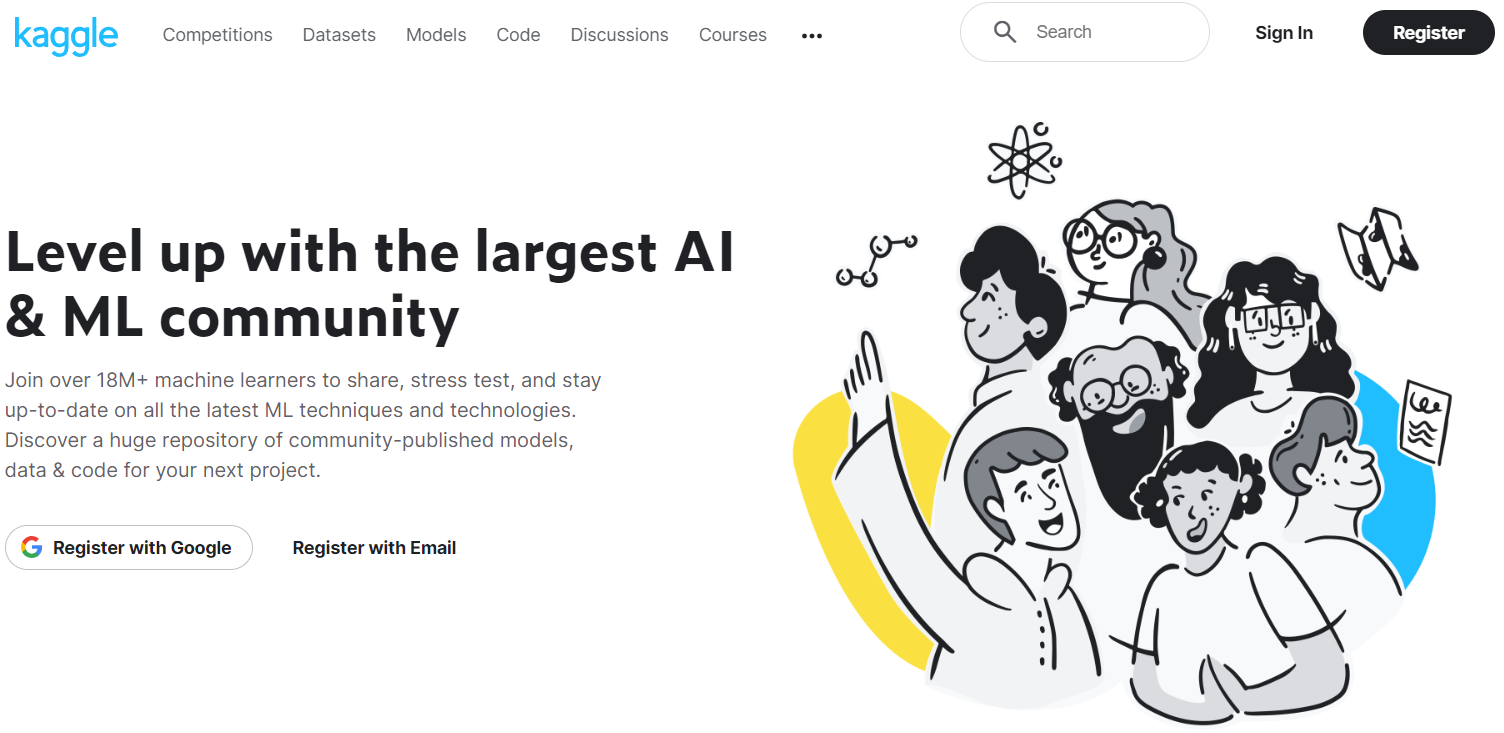

### 회원가입, 명령어 사용을 위한 API 토큰 발급
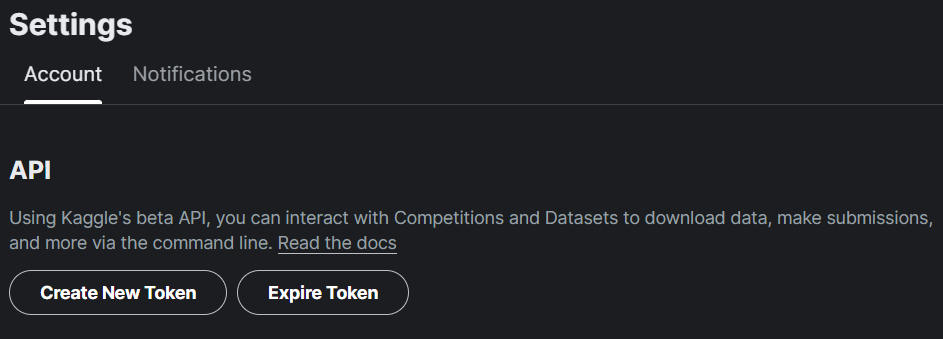

In [6]:
# 캐글 데이터 다운로드
!kaggle competitions download -c titanic


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# 캐글 컴피티션 제출
!kaggle competitions submit -c titanic -f "./titanic/gender_submission.csv" -m "first kaggle"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:00<00:00, 7.23kB/s]
100%|██████████| 3.18k/3.18k [00:01<00:00, 2.55kB/s]


# 데이터 전처리 연습하기
 - 데이터마님 - 빅데이터 분석기사 연습문제가 많다
 - https://www.datamanim.com/dataset/R/tutorial.html

# 타이타닉 생존확률 예측하기

1. 어떤 문제인가를 확인
    - 회귀문제인가? 분류문제인가?
    - 회귀라면 예측 대상이 어떤 숫자인가
    - 분류문제라면, 이진분류, 다중분류?

2. 데이터셋 확인
    - 각 컬럼별 내용(변수의 종류, NULL 여부, 이상치 등)
    - 컬럼의 드랍(ID, 일련번호 등)
    - 변수의 종류?(연속형 숫자인가, 불연속 이산형 변수인가, 명목형 변수인가, 서열형인가 등)
    - NULL이 있다면 그 변수의 특성에 따른 drop, fillin 여부 결정
    - 이상치가 있다면 어떻게 처리할것인지(코드에 있는 9999 등등)
    - 변수의 종류에 따른 처리여부 검토
      - 분석 알고리즘에 따라 상이함
      - 숫자형 - 로그변환, 스케일링
      - 문자형 - 원핫인코딩, 라벨인코딩 등
    - 파생변수(합성변수) 생성여부 판단 - 평가지표, 도메인 지식을 이용한 판단

3. 통계분석을 활용한 예측
    - 컬럼별 분포, 상관계수, 회귀 등 다양한 통계기법으로 데이터의 특성을 파악

3. 알고리즘 선정
    - 어떤 알고리즘을 사용하여 예측할지 ( 회귀, 로지스틱, 트리, GBM등등)
    - 각 알고리즘별 최적의 하이퍼 파라메터 세팅
    - 모델 평가
    - 챔피언 모델 선정
4. 예측
    - pred!

In [ ]:
# 0. 모듈 임포트

# 공통모듈
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 회귀모델
from sklearn.ensemble import RandomForestRegressor   # 회귀모델, 랜덤포레스트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error  #평가지표 MSE


In [ ]:
# 1. 데이터 불러오기
# - 문제에 나온 경로 그대로
X_train = pd.read_csv()
y_train = pd.read_csv()
X_test = pd.read_csv()


In [ ]:
# 2. 데이터 전처리
# 변수 나누기
# 변수 자료타입에 따라서 num과 cat에 나눠넣기
num_cols = []       #수치형 변수
cat_cols = []       #범주형 변수
y_cols = []         #예측대상(종속변수)

# tip) 컬럼 리스트 가져오기 (컬럼명 직접 적지 마세요)
# X_train.columns 로 출력

In [ ]:
# 결측치 갯수 확인
print(X_train.isnull().sum())
print(Y_train.isnull().sum())

# variable.info(), describe() 등으로도 확인 가능
#결측치가 있을 경우
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')   #최빈값 채우기로 수치형 범주형 모두 가능
X_train[cat_cols + num_cols] = imp.fit_transform(X_train[cat_cols + num_cols])
X_test[cat_cols + num_cols] = imp.fit_transform(X_test[cat_cols + num_cols])
#X_train[['Var1']] = imp.fit_transform(X_train[['Var1']])


In [ ]:
# 3. 데이터 모형 구축
# - 데이터 분할
X_tr, X_val, y_tr, y_val = train_test_split(X_train[cat_cols + num_cols],     # 독립변수
                                            y_train[y_col].values.ravel(),    # 종속변수, pd.Series -> nd.array
                                            test_size=0.3,                    # 7:3 분할
                                            random_state=42)   # 재현을 위해서


In [ ]:
# 데이터 스케일링 
## num_cols
sc = StandardScaler()
sc.fit(X_tr[num_cols])   # 누수방지를 위해 fit은 X_tr로만 수행(기준을 잡아주기) 후, 나머지에 대해 스케일링하기
X_tr[num_cols]   = sc.transform(X_tr[num_cols])
y_tr[num_cols]   = sc.transform(y_tr[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])


## cat_cols
X = pd.concat([X_train[cat_cols], X_test[cat_cols]])  

for col in cat_cols:     # 라벨인코더는 각 피쳐별로 수행해야 함
    le = LabelEncoder()
    le.fit(X[col])       # 누수 유의
    X_tr[col]   = sc.transform(X_tr[col])
    y_tr[col]   = sc.transform(y_tr[col])
    X_test[col] = sc.transform(X_test[col])

    # 변수 클래스 확인방법(not 필수)
    print(col)
    print(le.classes_, '\n')


In [ ]:
# 분류모델 학습
## 회귀모델에는 proba가 없음.
## predict 시 출력은 예측값을 직접 출력
m1 = RandomForestRegressor()
m1.fit(X_tr, y_tr)
pred1 = m1.predict(X_val)[:, 1]  


m2 = XGBRegressor()
m2.fit(X_tr, y_tr)
pred2 = m2.predict(X_val)[:, 1]


In [ ]:
# 4. 모형평가
# 분류모델 평가
score1 = mean_squared_error(y_val, pred1)
score2 = mean_squared_error(y_val, pred2)

print(score1, score2)   # mse는 적을수록 정확한 예측, 점수가 적은 모델을 선정

#최종 모델 선정
best_model = m1   # m1 or m2


In [ ]:
# 5. 결과 생성
# 분류모델의 경우, 채점 평가 지표에 따라 예측값인지, 예측 확률인지를 결정함

# 예측 **확률** 제출  roc_auc_score 인 경우?
  # pred = best_model.predict_proba(X_test[cat_cols + num_cols])[:,1]

# 예측 **결과** 제출   accuracy, F1 등 confusion matrix 기반 성능평가시
  # pred = best_model.predict(X_test[cat_cols + num_cols])[:,1]

#결과제출
# 답안 제출 참고
# 아래 코드는 예시이며 변수명 등 개인별로 변경하여 활용
result = pd.DataFrame('pred': pred)
result.to_csv("result.csv", index=False)
